In [25]:
# https://www.kaggle.com/datasets/yashdharme36/airfare-ml-predicting-flight-fares?select=Cleaned_dataset.csv
# Data obtained from kaggle

# https://www.youtube.com/watch?v=y4EMEpEnElQ
# Some interesting video 1h28

# Price model prediction - Flight Tickets 

Important information the day of scrapping was one day before first date.  
Analyzing how many days before I need to book?

In [17]:
# Libraries
from zipfile import ZipFile
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, make_scorer
import xgboost as xgb
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from yellowbrick.regressor import ResidualsPlot
import pickle

### 1. Data Analysis

In [3]:
# Extracting dataset
with ZipFile('C_dataset.csv.zip','r') as zip_ref:
    zip_ref.extractall('./data')

In [4]:
# Reading file
df = pd.read_csv('data/Cleaned_dataset.csv')
df.head()

,Date_of_journey,Journey_day,Airline,Flight_code,Class,Source,Departure,Total_stops,Arrival,Destination,Duration_in_hours,Days_left,Fare
0,2023-01-16,Monday,SpiceJet,SG-8169,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.0833,1,5335
1,2023-01-16,Monday,Indigo,6E-2519,Economy,Delhi,After 6 PM,non-stop,Before 6 AM,Mumbai,2.3333,1,5899
2,2023-01-16,Monday,GO FIRST,G8-354,Economy,Delhi,After 6 PM,non-stop,Before 6 AM,Mumbai,2.1667,1,5801
3,2023-01-16,Monday,SpiceJet,SG-8709,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.0833,1,5794
4,2023-01-16,Monday,Air India,AI-805,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.1667,1,5955


In [271]:
# Exploring data
print(df.shape)
df.info()

(452088, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452088 entries, 0 to 452087
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Date_of_journey    452088 non-null  object 
 1   Journey_day        452088 non-null  object 
 2   Airline            452088 non-null  object 
 3   Flight_code        452088 non-null  object 
 4   Class              452088 non-null  object 
 5   Source             452088 non-null  object 
 6   Departure          452088 non-null  object 
 7   Total_stops        452088 non-null  object 
 8   Arrival            452088 non-null  object 
 9   Destination        452088 non-null  object 
 10  Duration_in_hours  452088 non-null  float64
 11  Days_left          452088 non-null  int64  
 12  Fare               452088 non-null  int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 44.8+ MB


In [5]:
# Analyzing null elements
df.isna().sum()

Date_of_journey      0
Journey_day          0
Airline              0
Flight_code          0
Class                0
Source               0
Departure            0
Total_stops          0
Arrival              0
Destination          0
Duration_in_hours    0
Days_left            0
Fare                 0
dtype: int64

In [31]:
# Analyzing duplicates
df.duplicated().sum()

6722

In [32]:
df[df.duplicated()]

,Date_of_journey,Journey_day,Airline,Flight_code,Class,Source,Departure,Total_stops,Arrival,Destination,Duration_in_hours,Days_left,Fare
19211,2023-01-16,Monday,Vistara,UK-627,Economy,Delhi,12 PM - 6 PM,2+-stop,After 6 PM,Bangalore,29.9167,1,11117
19321,2023-01-16,Monday,Vistara,UK-627,Premium Economy,Delhi,12 PM - 6 PM,2+-stop,After 6 PM,Bangalore,31.5833,1,20084
19323,2023-01-16,Monday,Vistara,UK-627,Premium Economy,Delhi,12 PM - 6 PM,2+-stop,After 6 PM,Bangalore,33.5000,1,20084
19633,2023-01-17,Tuesday,Vistara,UK-929,Economy,Delhi,After 6 PM,2+-stop,After 6 PM,Bangalore,21.9167,2,15473
19670,2023-01-17,Tuesday,Vistara,UK-627,Premium Economy,Delhi,12 PM - 6 PM,2+-stop,After 6 PM,Bangalore,29.9167,2,15196
...,...,...,...,...,...,...,...,...,...,...,...,...,...
451999,2023-03-06,Monday,Air India,AI-482,Economy,Ahmedabad,12 PM - 6 PM,1-stop,Before 6 AM,Chennai,10.4167,50,11646
452010,2023-03-06,Monday,Vistara,UK-918,Economy,Ahmedabad,Before 6 AM,1-stop,12 PM - 6 PM,Chennai,11.2500,50,15856
452011,2023-03-06,Monday,Vistara,UK-918,Economy,Ahmedabad,Before 6 AM,1-stop,12 PM - 6 PM,Chennai,11.2500,50,15856
452085,2023-03-06,Monday,Vistara,UK-918,Business,Ahmedabad,Before 6 AM,1-stop,12 PM - 6 PM,Chennai,11.2500,50,69254


In [33]:
df[(df['Flight_code']=='UK-627') & (df['Class']=='Economy') & (df['Duration_in_hours']==29.9167) & (df['Journey_day']=='Monday') & 
   (df['Date_of_journey']=='2023-01-16')]

,Date_of_journey,Journey_day,Airline,Flight_code,Class,Source,Departure,Total_stops,Arrival,Destination,Duration_in_hours,Days_left,Fare
19210,2023-01-16,Monday,Vistara,UK-627,Economy,Delhi,12 PM - 6 PM,2+-stop,After 6 PM,Bangalore,29.9167,1,11117
19211,2023-01-16,Monday,Vistara,UK-627,Economy,Delhi,12 PM - 6 PM,2+-stop,After 6 PM,Bangalore,29.9167,1,11117


In [34]:
df[(df['Flight_code']=='UK-627') & (df['Class']=='Premium Economy') & (df['Duration_in_hours']==31.5833) & (df['Journey_day']=='Monday') & 
   (df['Date_of_journey']=='2023-01-16')]

,Date_of_journey,Journey_day,Airline,Flight_code,Class,Source,Departure,Total_stops,Arrival,Destination,Duration_in_hours,Days_left,Fare
19320,2023-01-16,Monday,Vistara,UK-627,Premium Economy,Delhi,12 PM - 6 PM,2+-stop,After 6 PM,Bangalore,31.5833,1,20084
19321,2023-01-16,Monday,Vistara,UK-627,Premium Economy,Delhi,12 PM - 6 PM,2+-stop,After 6 PM,Bangalore,31.5833,1,20084


After a review fo some duplicated elements, the information per line shows identical flights with the same details per line. This is completely normal as one person could have booked the flight the same day as another person. However, as our model will predict the price of a flight, duplicated elements might introduce biais in the model, so we will remove all duplicated elements. 

In [6]:
# Erasing duplicated
df_r=df.drop_duplicates().reset_index(drop=True)
df_r.head()

,Date_of_journey,Journey_day,Airline,Flight_code,Class,Source,Departure,Total_stops,Arrival,Destination,Duration_in_hours,Days_left,Fare
0,2023-01-16,Monday,SpiceJet,SG-8169,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.0833,1,5335
1,2023-01-16,Monday,Indigo,6E-2519,Economy,Delhi,After 6 PM,non-stop,Before 6 AM,Mumbai,2.3333,1,5899
2,2023-01-16,Monday,GO FIRST,G8-354,Economy,Delhi,After 6 PM,non-stop,Before 6 AM,Mumbai,2.1667,1,5801
3,2023-01-16,Monday,SpiceJet,SG-8709,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.0833,1,5794
4,2023-01-16,Monday,Air India,AI-805,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.1667,1,5955


In [255]:
# Borrar
df_r[df_r['Duration_in_hours']>43]

,Date_of_journey,Journey_day,Airline,Flight_code,Class,Source,Departure,Total_stops,Arrival,Destination,Duration_in_hours,Days_left,Fare
401196,2023-01-17,Tuesday,Vistara,UK-918,Premium Economy,Ahmedabad,Before 6 AM,1-stop,Before 6 AM,Delhi,43.5833,2,20954
401463,2023-01-19,Thursday,Vistara,UK-918,Economy,Ahmedabad,Before 6 AM,1-stop,Before 6 AM,Delhi,43.5833,4,18187
401513,2023-01-19,Thursday,Vistara,UK-918,Premium Economy,Ahmedabad,Before 6 AM,1-stop,Before 6 AM,Delhi,43.5833,4,20954


In [37]:
#Borrar
df_r[['Class']][(df_r['Total_stops']=='non-stop')&(df_r['Source']=='Delhi')
                                          &(df_r['Destination']=='Chennai')].value_counts().sort_index()

Class          
Business            486
Economy            1018
Premium Economy     199
Name: count, dtype: int64

In [7]:
# Parsing dates 
df_r['Date_of_journey']=pd.to_datetime(df_r['Date_of_journey'])

# Customizing
df_r.rename(columns={'Fare': 'Price','Departure':'Dep_time','Arrival':'Arriv_time',
                     'Source':'Origin','Journey_day':'Journey_weekday'}, inplace=True)
df_r['Journey_month']=df_r['Date_of_journey'].dt.month
df_r['Journey_day']=df_r['Date_of_journey'].dt.day
df_r.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445366 entries, 0 to 445365
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Date_of_journey    445366 non-null  datetime64[ns]
 1   Journey_weekday    445366 non-null  object        
 2   Airline            445366 non-null  object        
 3   Flight_code        445366 non-null  object        
 4   Class              445366 non-null  object        
 5   Origin             445366 non-null  object        
 6   Dep_time           445366 non-null  object        
 7   Total_stops        445366 non-null  object        
 8   Arriv_time         445366 non-null  object        
 9   Destination        445366 non-null  object        
 10  Duration_in_hours  445366 non-null  float64       
 11  Days_left          445366 non-null  int64         
 12  Price              445366 non-null  int64         
 13  Journey_month      445366 non-null  int32   

In [74]:
### Useful dictionnaries
# Dictionary for Class
class_dict = {
    1 : "Economy",
    2 : "Business",
    3 : "Premium Economy",
    4 : "First",
}

# Dictionnary for days in a week
days_dict={
    1:'Monday',
    2:'Tuesday',
    3:'Wednesday',
    4:'Thursday',
    5:'Friday',  
    6:'Saturday',
    7:'Sunday',      
}

# Dictionnary for Origin countries
country_dict={
    1:'Delhi',
    2:'Mumbai',
    3:'Bangalore',
    4:'Hyderabad',
    5:'Chennai',
    6:'Kolkata',
    7:'Ahmedabad'
}

How to deal with outliers? Windzorising? it means change a value for the nearest value+1

### 1.1. Analyzing distribution of categorical variables

#### A. Distribution of Origin and Destination

In [7]:
print(df_r['Origin'].value_counts())
df_r['Destination'].value_counts()

Origin
Delhi        82481
Mumbai       79894
Bangalore    72668
Hyderabad    56054
Chennai      55659
Kolkata      54193
Ahmedabad    44417
Name: count, dtype: int64


Destination
Mumbai       81675
Delhi        76758
Bangalore    71603
Hyderabad    61775
Chennai      57060
Kolkata      53465
Ahmedabad    43030
Name: count, dtype: int64

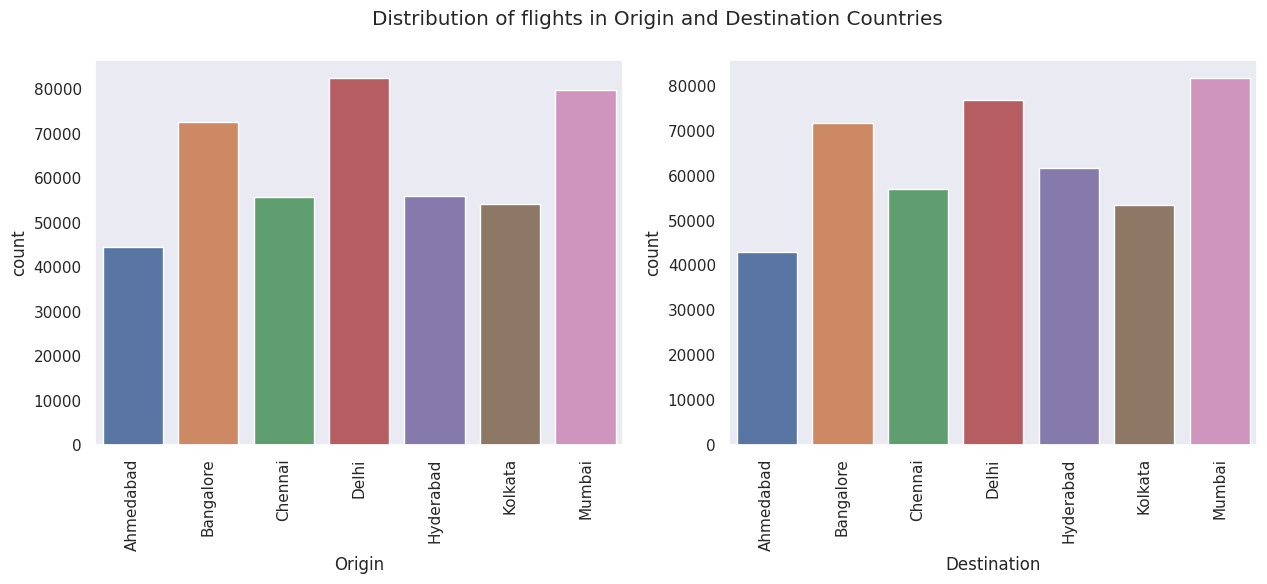

In [51]:
# Filter out Matplotlib FutureWarnings
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.xticks(rotation=90)
sns.countplot(x='Origin',data=df_r, order=sorted(df_r['Origin'].unique()))
plt.subplot(1,2,2)
plt.xticks(rotation=90)
sns.countplot(x='Destination',data=df_r, order=sorted(df_r['Destination'].unique()))
plt.suptitle('Distribution of flights in Origin and Destination Countries')
plt.show()

Analysis of distribution taking into account days of the week

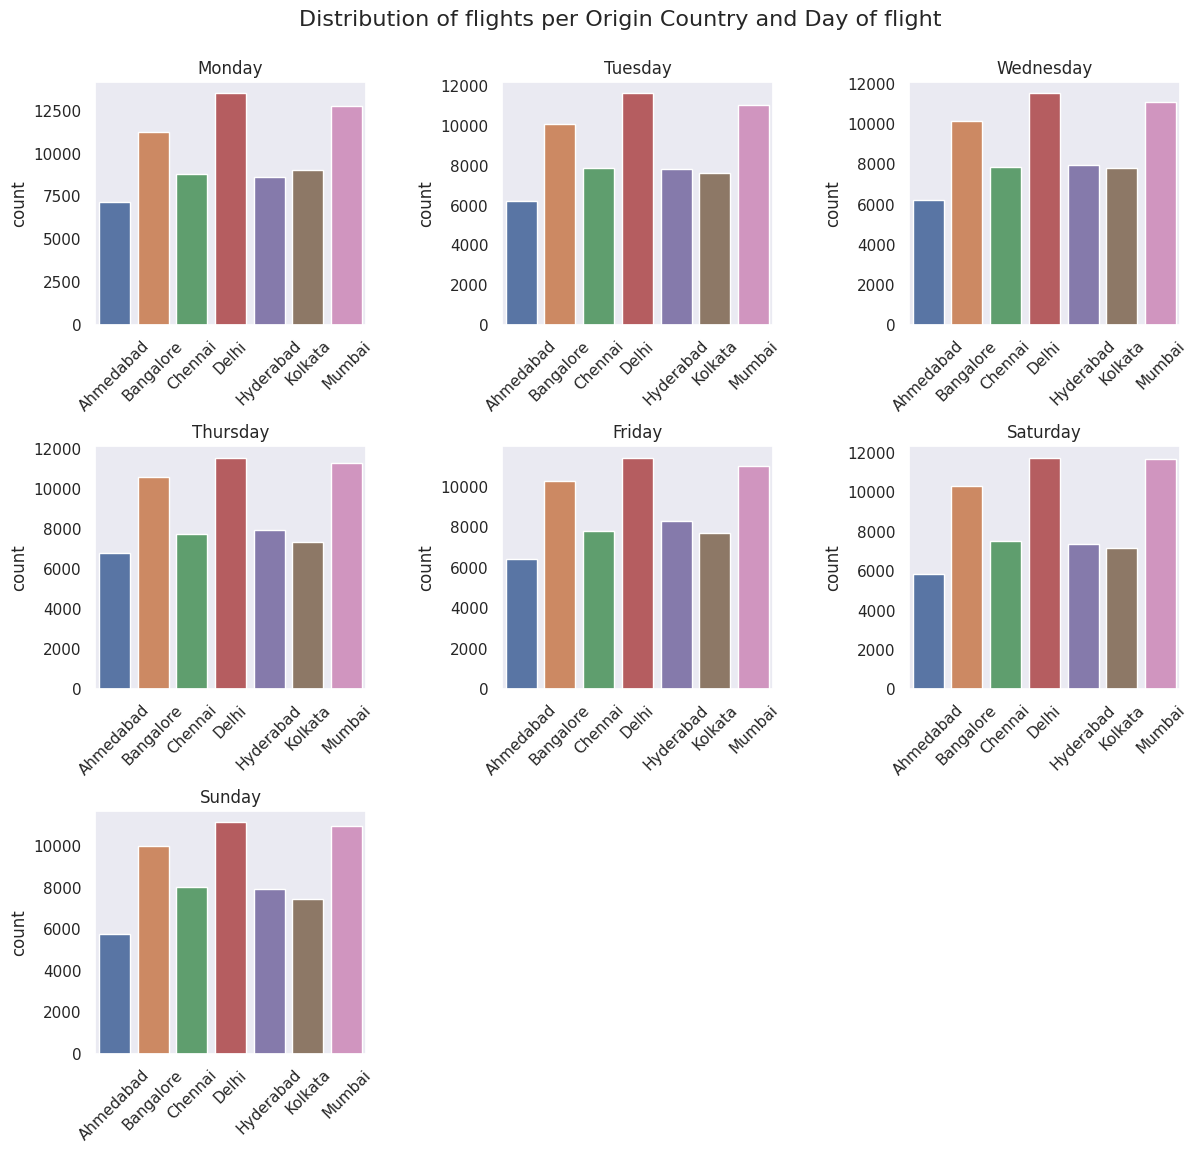

In [52]:
plt.figure(figsize=(14,12))
for i in range(7):
    plt.subplot(3,3,i+1)
    sns.countplot(x='Origin',data=df_r[df_r['Journey_weekday']==days_dict[i+1]],order=sorted(df_r['Origin'].unique()))
    plt.xticks(rotation=45)
    plt.xlabel('')
    plt.title(days_dict[i+1])
plt.subplots_adjust(hspace=0.5, wspace=0.5, top=0.92)
plt.suptitle('Distribution of flights per Origin Country and Day of flight',fontsize=16)
plt.show()

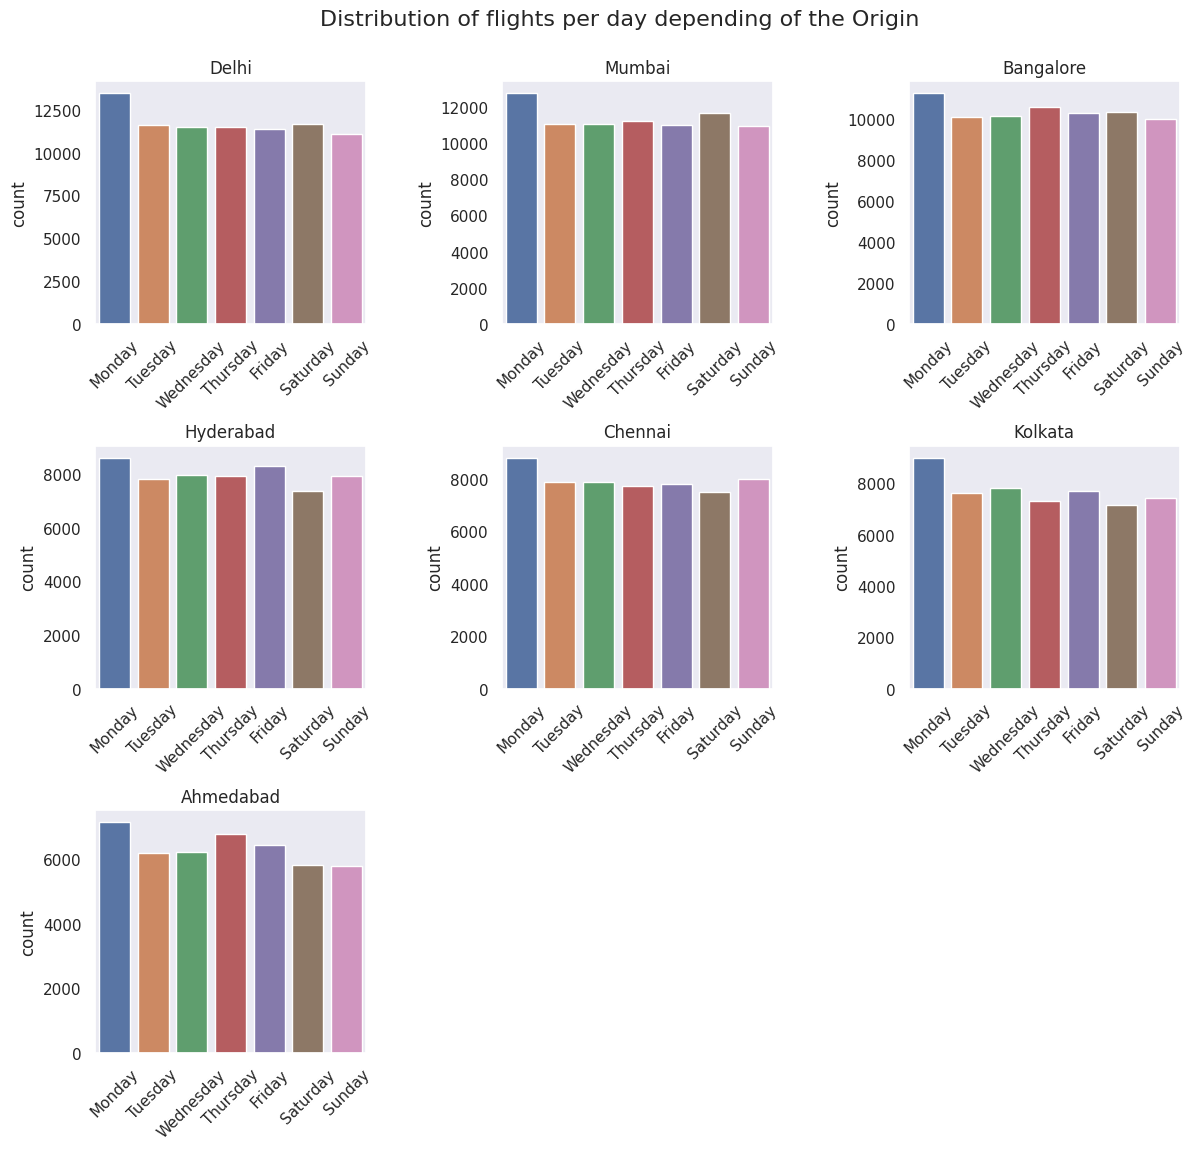

In [111]:
plt.figure(figsize=(14,12))
for i in range(7):
    plt.subplot(3,3,i+1)
    sns.countplot(x='Journey_day_of_week',data=df_r[df_r['Origin']==country_dict[i+1]])
    plt.xticks(rotation=45)
    plt.xlabel('')
    plt.title(country_dict[i+1])
plt.subplots_adjust(hspace=0.5, wspace=0.5, top=0.92)
plt.suptitle('Distribution of flights per day depending of the Origin',fontsize=16)
plt.show()

#### Some conclusions:
The majority of the flights are bought for a monday, there are not so much variations about the other days. However, if we take into account the Origin Country, in some of them people prefer to book a flight in Thursday or Friday (as second option after monday)

#### B. Distribution of Airline and Class

In [ ]:
df_r['Class'].value_counts()

Class
Economy            248323
Business           126535
Premium Economy     70364
First                 144
Name: count, dtype: int64

In [ ]:
df_r.groupby(['Airline', 'Class']).size().reset_index(name='Count')

,Airline,Class,Count
0,Air India,Business,52256
1,Air India,Economy,66005
2,Air India,First,144
3,AirAsia,Economy,15764
4,AkasaAir,Economy,2230
5,AllianceAir,Economy,393
6,GO FIRST,Economy,10786
7,Indigo,Economy,65659
8,SpiceJet,Economy,5863
9,StarAir,Economy,62


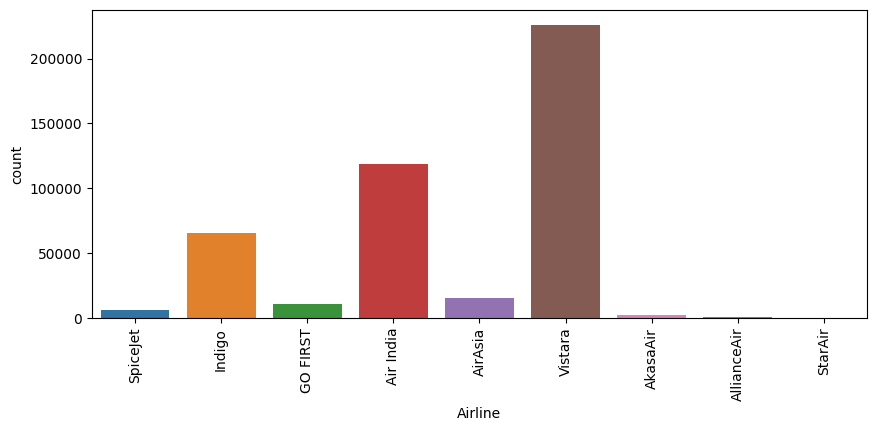

In [ ]:
plt.figure(figsize=(10,4))
sns.countplot(x='Airline',data=df_r)
plt.xticks(rotation=90)
plt.show()

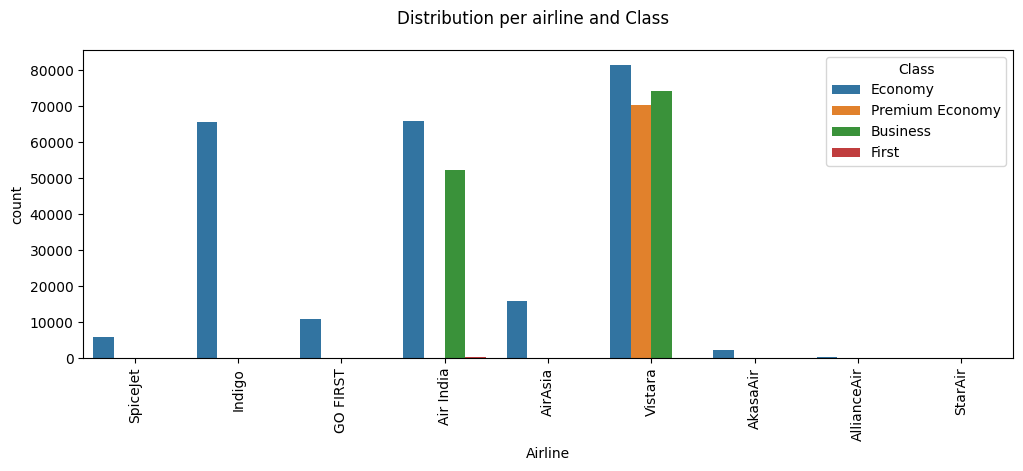

In [ ]:
plt.figure(figsize=(12,4))
plt.suptitle('Distribution per airline and Class')
#plt.subplot(1,2,1)
sns.countplot(x='Airline', hue='Class', data=df_r)
plt.xticks(rotation=90)
#plt.subplot(1,2,2)
#sns.countplot(x='Class', data=df_r)
#plt.xticks(rotation=90)
plt.show()

### 1.2. Analyzing distribution of some numerical variables

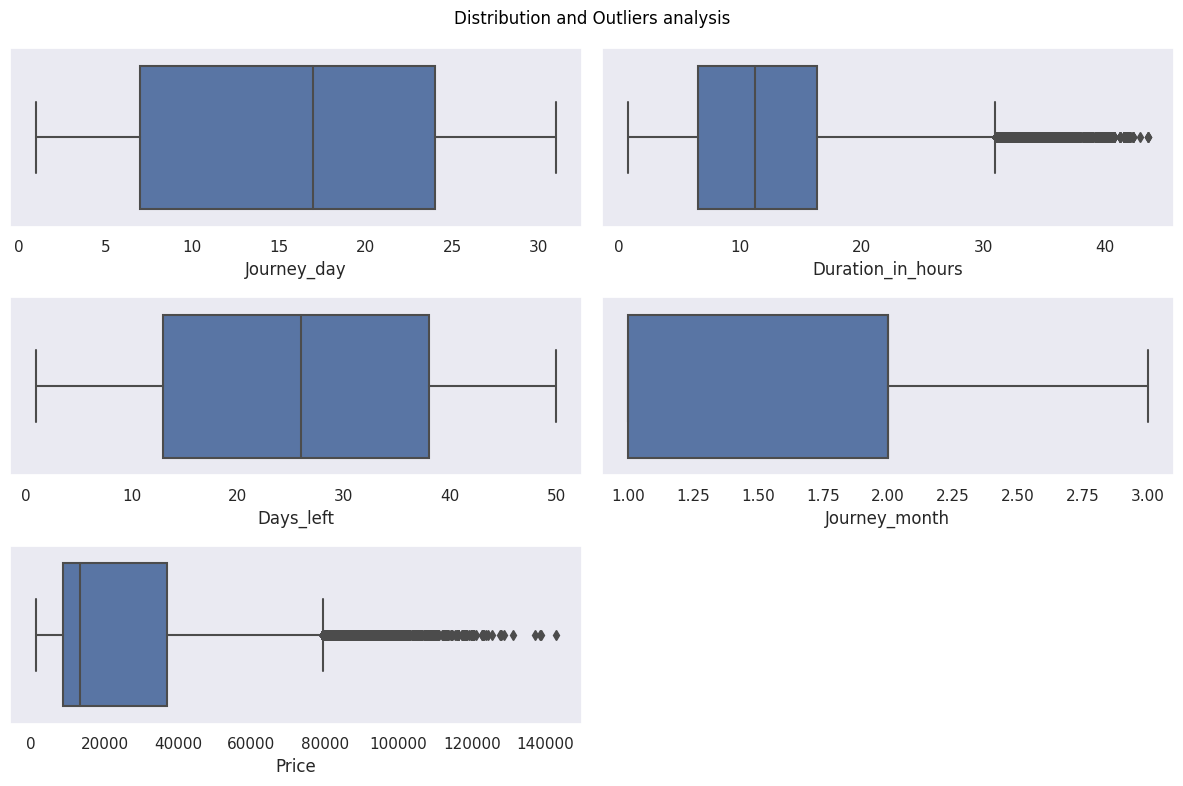

In [37]:
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")
numeric_columns = ['Journey_day', 'Duration_in_hours', 'Days_left', 'Journey_month','Price']

# Analyzing each numeric column to evaluate outliers
plt.figure(figsize=(12, 8))
plt.suptitle('Distribution and Outliers analysis')
sns.set(style="dark")  # Set the style of the seaborn plot

for i in range(len(numeric_columns)):
    plt.subplot(3, 2, i+1)
    sns.boxplot(x=df_r[numeric_columns[i]])

plt.tight_layout()

plt.show()

A quick review let us know we need to see carefully two variables: "Duration in hours" and "Price" as there are some points far from the media.
However, as there are 4 different classes included in the price analysis, those outliers are understable. 
To see if these points are really outliers we need to analyze separately. 

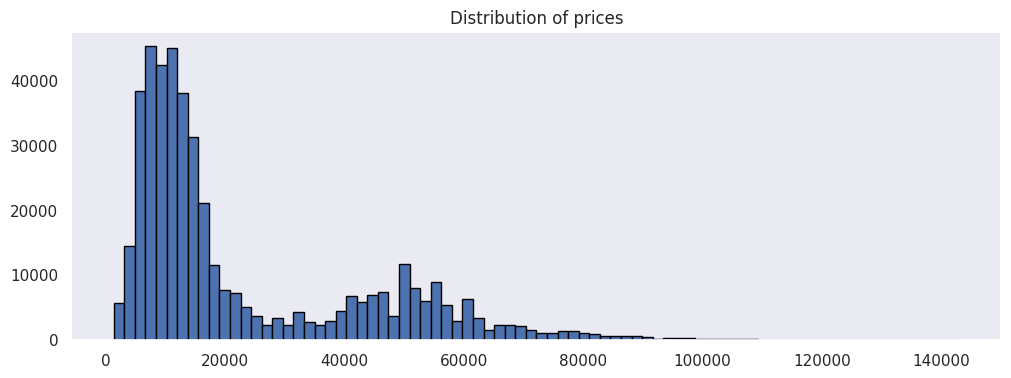

In [131]:
# Analysis of distribution of prices (Total)
plt.figure(figsize=(12,4))
plt.hist(x=df_r['Price'], bins=80, edgecolor='black')
plt.title('Distribution of prices')
plt.show()

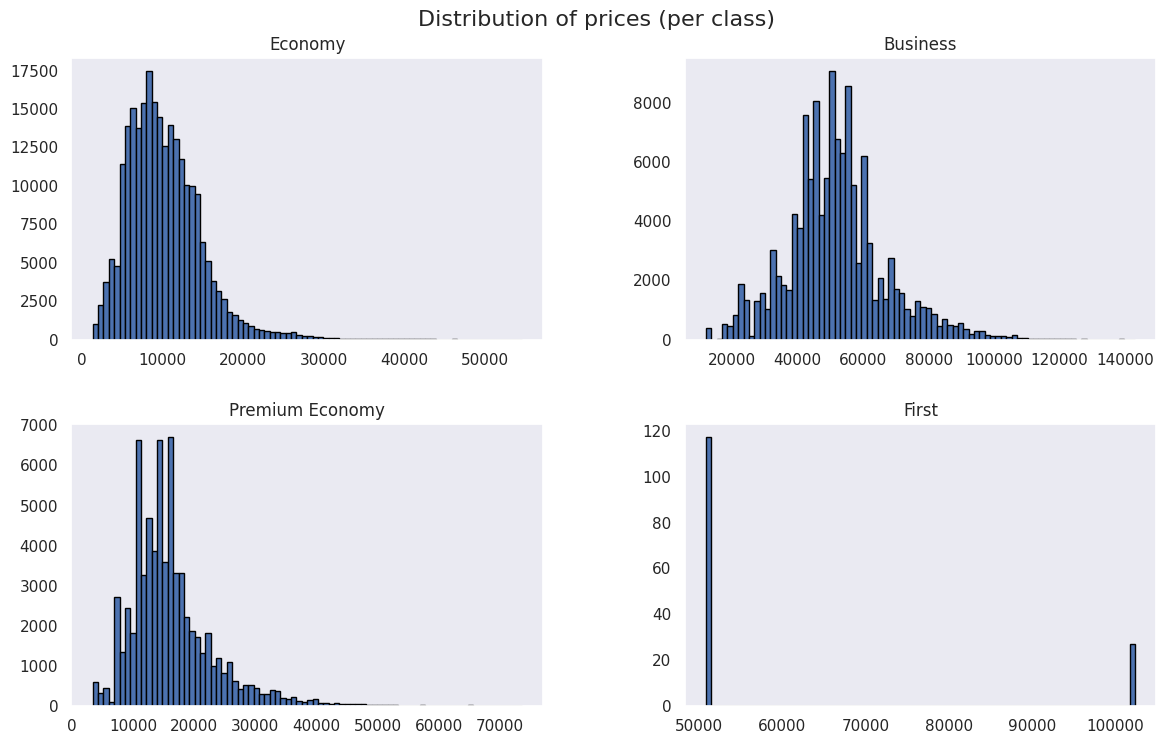

In [132]:
# Analysis of distribution of prices (per class)

plt.figure(figsize=(14,8))
for i in range(len(class_dict)):
    plt.subplot(2,2,i+1)
    plt.hist(x=df_r['Price'][df_r['Class']==class_dict[i+1]], bins=80, edgecolor='black')
    plt.xlabel('')
    plt.title(class_dict[i+1])
plt.subplots_adjust(hspace=0.3, wspace=0.3, top=0.92)
plt.suptitle('Distribution of prices (per class)',fontsize=16)
plt.show()

As we saw the distribution of prices are different depending on the classes. So to evaluate if we have outliers, we must to make a deeper analysis taking into account the class, the journey_month, the total_stops and the duration in hours.
It is important to consider the possible outliers represents real points as this data was obtained scrapping

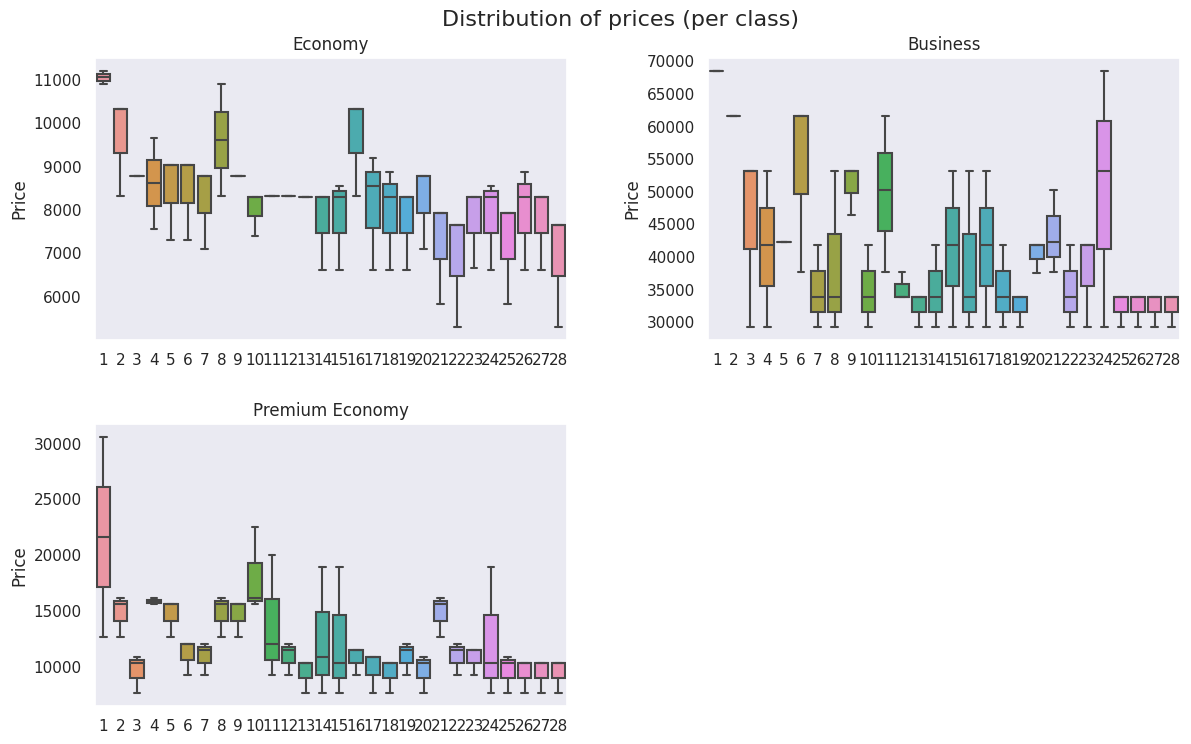

In [109]:
plt.figure(figsize=(14,8))
for i in range(len(class_dict)):
    x_print= df_r['Journey_day'][(df_r['Class']==class_dict[i+1])&(df_r['Flight_code']=='UK-936')&(df_r['Journey_month']==2)
                                 &(df_r['Total_stops']=='1-stop')&(df_r['Duration_in_hours']<6)]
    if not x_print.empty:
        plt.subplot(2,2,i+1)
        sns.boxplot(x=x_print,y=df_r['Price'])
        plt.xlabel('')
        plt.title(class_dict[i+1])
    plt.subplots_adjust(hspace=0.3, wspace=0.3, top=0.92)
    plt.suptitle('Distribution of prices (per class)',fontsize=16)
plt.show()


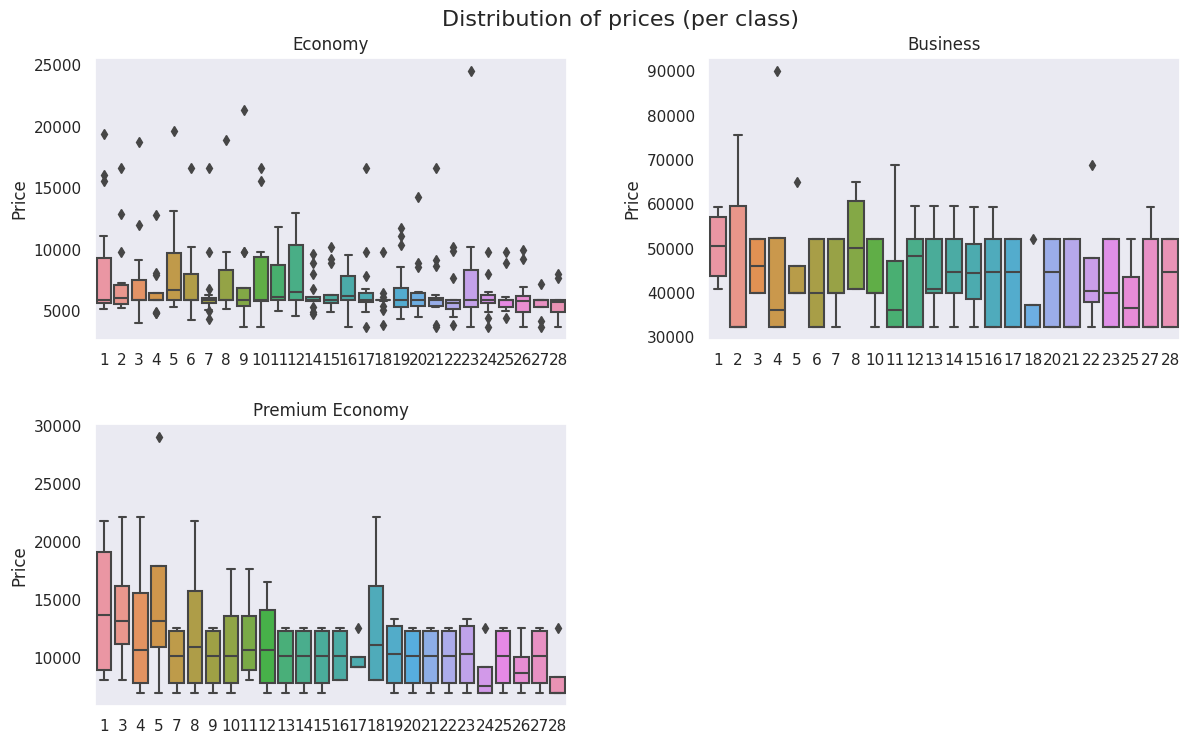

In [130]:
plt.figure(figsize=(14,8))
for i in range(len(class_dict)):
    x_print= df_r['Journey_day'][(df_r['Class']==class_dict[i+1])&(df_r['Origin']=='Ahmedabad')&(df_r['Destination']=='Bangalore')&(df_r['Journey_month']==2)
                                 &(df_r['Total_stops']=='1-stop')&(df_r['Duration_in_hours']<6)]
    if not x_print.empty:
        plt.subplot(2,2,i+1)
        sns.boxplot(x=x_print,y=df_r['Price'])
        #&(df_r['Journey_month']==2)
        plt.xlabel('')
        plt.title(class_dict[i+1])
    plt.subplots_adjust(hspace=0.3, wspace=0.3, top=0.92)
    plt.suptitle('Distribution of prices (per class)',fontsize=16)
plt.show()

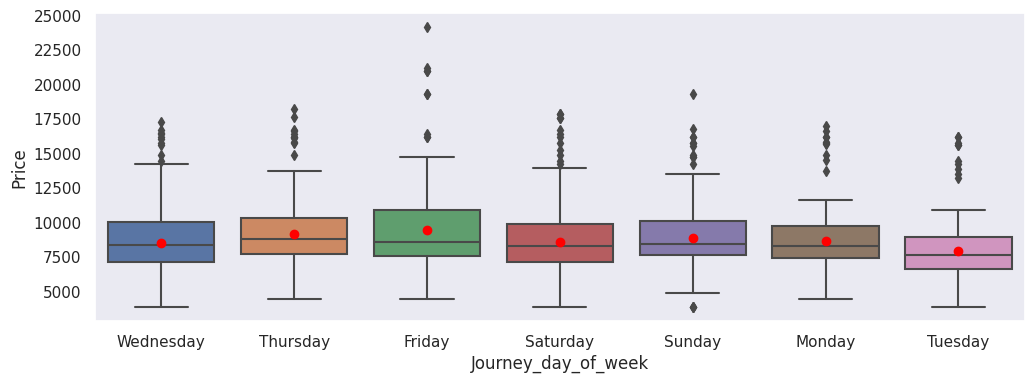

In [134]:

plt.figure(figsize=(12,4))
sns.boxplot(x=df_r['Journey_day_of_week'][(df_r['Class']=='Economy')&(df_r['Flight_code']=='UK-918')&(df_r['Journey_month']==2)&(df_r['Total_stops']=='1-stop')], 
            y=df_r['Price'],showmeans=True, 
                                  meanprops={'marker':'o', 'markerfacecolor':'red', 'markeredgecolor':'red'})
plt.show()

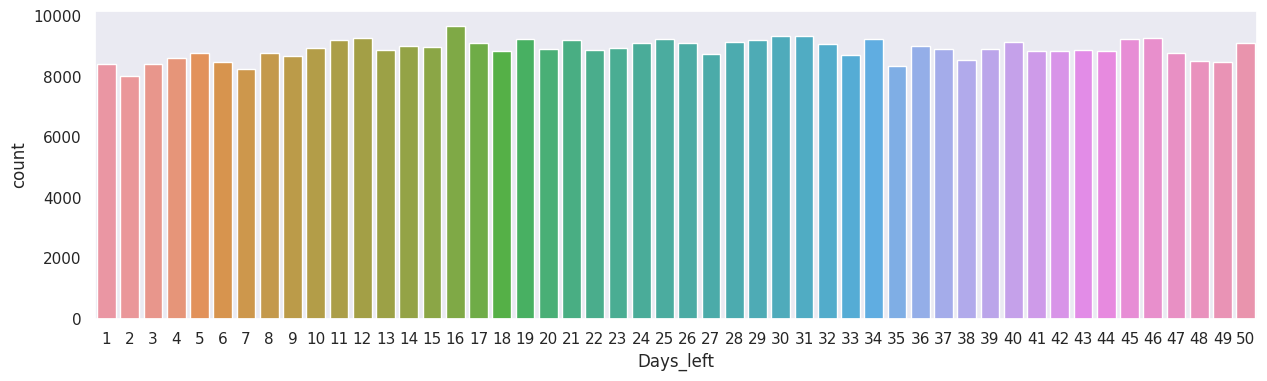

In [38]:
# Booking analysis
plt.figure(figsize=(15,4))
sns.countplot(x='Days_left', data=df_r)
plt.show()

This chart let us know a high number of people prefers to buy a ticket 16 days before their flight

## 2. Modelisation

### 2.1. Dummies and encoding
As all out features are not numerical we must encode those features. The flight code represents important information, but as there are several unique values in this column we are going to use a Label encoder and for the other features hot-encodding

In [200]:
# Label encoder
df_r['flight_code_encoded'] = LabelEncoder().fit_transform(df_r['Flight_code'])

In [7]:
# Getting dummies 
df_not_dum = df_r.drop(columns=['Date_of_journey','Journey_weekday','Airline','Class','Origin','Dep_time','Total_stops','Arriv_time','Destination'], axis=1)
df_dum = df_r[['Journey_weekday','Airline','Class','Origin','Dep_time','Total_stops','Arriv_time','Destination']]
df_encoded = pd.get_dummies(df_dum, columns=['Journey_weekday','Airline','Class','Origin','Dep_time','Total_stops','Arriv_time','Destination'], dtype='int')


In [8]:
# Final dataframe
df_final = df_not_dum.join(df_encoded, how='inner')
df_final = df_final.drop(columns=['Flight_code'],axis=1)
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445366 entries, 0 to 445365
Data columns (total 51 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Duration_in_hours          445366 non-null  float64
 1   Days_left                  445366 non-null  int64  
 2   Price                      445366 non-null  int64  
 3   Journey_month              445366 non-null  int32  
 4   Journey_day                445366 non-null  int32  
 5   flight_code_encoded        445366 non-null  int64  
 6   Journey_weekday_Friday     445366 non-null  int64  
 7   Journey_weekday_Monday     445366 non-null  int64  
 8   Journey_weekday_Saturday   445366 non-null  int64  
 9   Journey_weekday_Sunday     445366 non-null  int64  
 10  Journey_weekday_Thursday   445366 non-null  int64  
 11  Journey_weekday_Tuesday    445366 non-null  int64  
 12  Journey_weekday_Wednesday  445366 non-null  int64  
 13  Airline_Air India          44

### 2.2. Test and Train

In [12]:
X = df_final.drop('Price', axis=1)
y = df_final['Price']

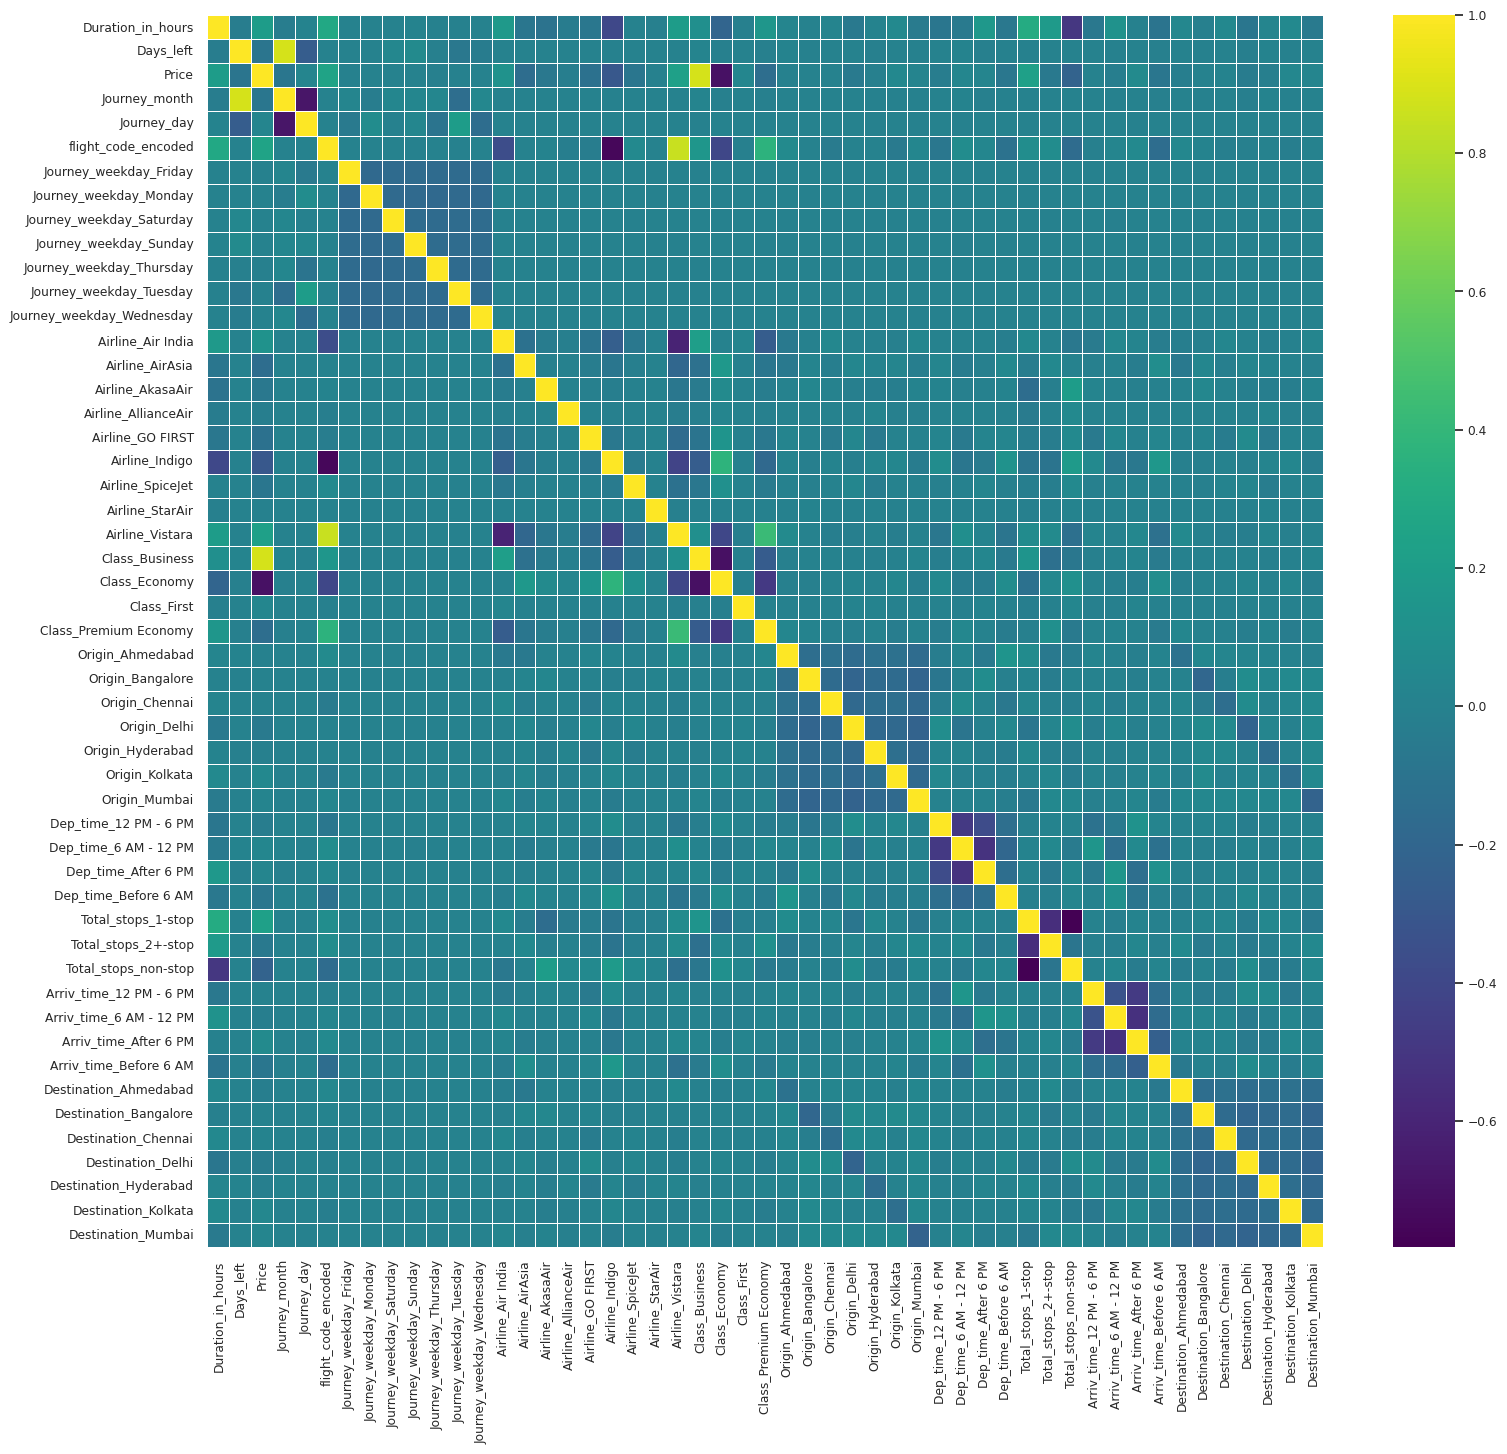

In [12]:
# Heatmapping
correlation_matrix = df_final.corr()

# Set up the matplotlib figure
plt.figure(figsize=(18, 16))  # Adjust the figure size based on the number of variables

# Create a heatmap using Seaborn
sns.heatmap(correlation_matrix, cmap="viridis", linewidths=.5)

sns.set(font_scale=0.8)
plt.show()

In [10]:
# Selecting relevant variables
selection = ExtraTreesRegressor()
selection.fit(X,y)

ExtraTreesRegressor()

In [11]:
print(selection.feature_importances_)

[2.01787319e-02 1.40388366e-02 1.09921335e-02 6.28487684e-03
 2.65872742e-02 1.52777020e-03 1.62221760e-03 1.85758984e-03
 2.12226071e-03 1.54803007e-03 1.48375320e-03 1.65865346e-03
 5.69899117e-03 6.39119691e-04 3.83871096e-06 7.98149750e-06
 2.18258092e-04 5.70415166e-04 1.08713308e-04 1.44590840e-05
 6.38438627e-03 7.86866342e-01 1.12223936e-02 4.83765503e-04
 2.68002915e-04 2.51076038e-03 2.53293969e-03 1.84737306e-03
 3.88352937e-03 1.54607743e-03 3.34387918e-03 3.22300049e-03
 2.21418694e-03 2.81406952e-03 2.49688834e-03 1.27162249e-03
 1.58199656e-03 1.39286356e-03 3.81759981e-02 2.14571441e-03
 2.27905164e-03 2.25986393e-03 1.17274065e-03 3.50350429e-03
 2.43111820e-03 1.95988980e-03 4.42853412e-03 1.80927582e-03
 3.76915155e-03 3.01717521e-03]


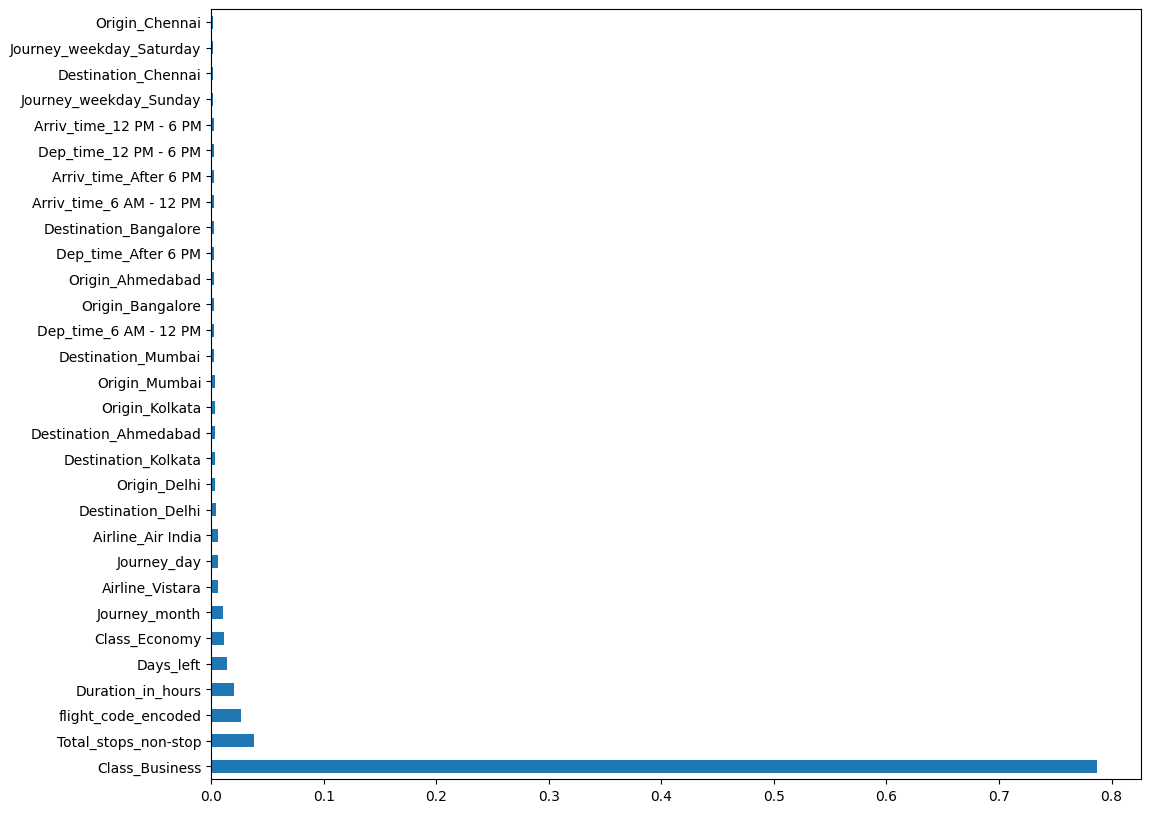

In [13]:
plt.figure(figsize=(12,10))
import_features = pd.Series(selection.feature_importances_,index=X.columns)
import_features.nlargest(30).plot(kind='barh')
plt.show()

In [13]:
# Preparing train and test set
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=80, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((356292, 50), (89074, 50), (356292,), (89074,))

In [90]:
# Training model
model = xgb.XGBRegressor(objective='reg:squarederror',colsample_bytree=0.8,learning_rate=0.1, max_depth=20 ,alpha=0.1 , n_estimators=50)

In [45]:
cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')

In [46]:
print("Cross-Validation Scores:", cv_scores)
print("Mean R2 Score:", cv_scores.mean())

Cross-Validation Scores: [0.85047333 0.86779472 0.90637756 0.89703369 0.86066013]
Mean R2 Score: 0.8764678843726739


In [51]:
# Hyperparameters
# Create a pipeline with the XGBoost model
pipeline = Pipeline([
    ('model', model)
])

# Define the hyperparameters to search
param_grid = {
    'model__n_estimators': [20, 50, 100],           
    'model__learning_rate': [0.01, 0.1, 0.2],       
    'model__max_depth': [10, 20, 30],               
    'model__subsample': [0.8, 1.0],                 
    'model__colsample_bytree': [0.3, 0.5, 0.8],     
    }

# Use R^2 as the scoring metric
scorer = make_scorer(r2_score)

# Create the grid search
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring=scorer, cv=5)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding R^2 score
print("Best Parameters: ", grid_search.best_params_)
print("Best R^2 Score: ", grid_search.best_score_)

: 

In [47]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [49]:
# Evaluating model
# model = xgb.XGBRegressor(objective='reg:squarederror',colsample_bytree=0.8,learning_rate=0.1, max_depth=40 ,alpha=0.1 , n_estimators=20)
print("r2_score(y_test,y_pred)",r2_score(y_test,y_pred))

r2_score(y_test,y_pred) 0.9707321101036893


In [50]:
print('MAE ', mean_absolute_error(y_test,y_pred))

MAE  1709.4585608880152


In [89]:
print('RMSE', mean_squared_error(y_test,y_pred)**0.5)

RMSE 3494.861910738285


In [ ]:
# Evaluation of the model on the test set
y_pred = grid_search.predict(X_test)
test_r2 = r2_score(y_test, y_pred)
print("Test R^2 Score: ", test_r2)

In [26]:
min_value = np.min(y)
max_value = np.max(y)
print("Range:", max_value - min_value)

Range: 141712


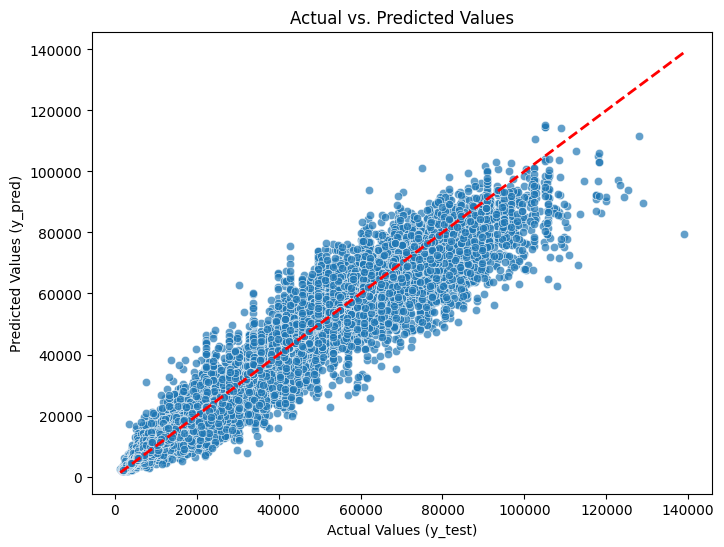

In [57]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)

# Add labels and title
plt.xlabel("Actual Values (y_test)")
plt.ylabel("Predicted Values (y_pred)")
plt.title("Actual vs. Predicted Values")

# Add a diagonal line for reference (perfect predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)

# Show the plot
plt.show()

In [96]:
y_log = np.log1p(y)

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X,y_log,random_state=80, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((356292, 50), (89074, 50), (356292,), (89074,))

In [98]:
model = xgb.XGBRegressor(objective='reg:squarederror',colsample_bytree=0.8,learning_rate=0.1, max_depth=20 ,alpha=0.1 , n_estimators=50)

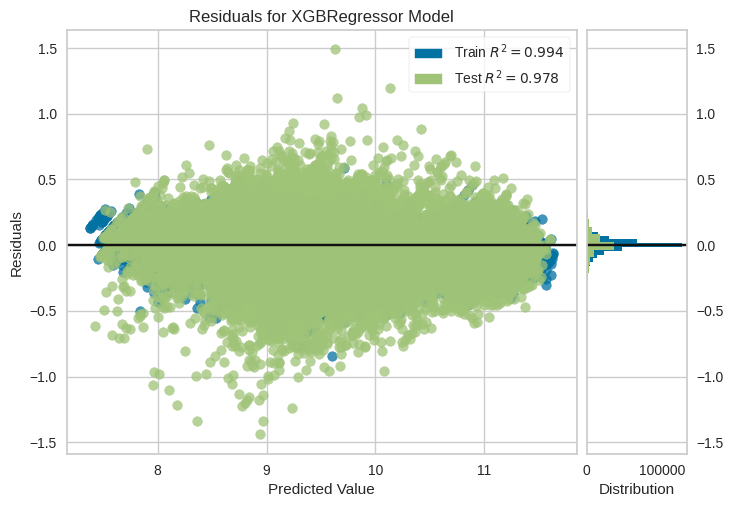

<Axes: title={'center': 'Residuals for XGBRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [99]:
from sklearn.linear_model import Ridge

#from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import ResidualsPlot

# Instantiate the linear model and visualizer
# model = Ridge()
visualizer = ResidualsPlot(model)
# visualizer = ResidualsPlot(model,hist=False, qqplot=True)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()    

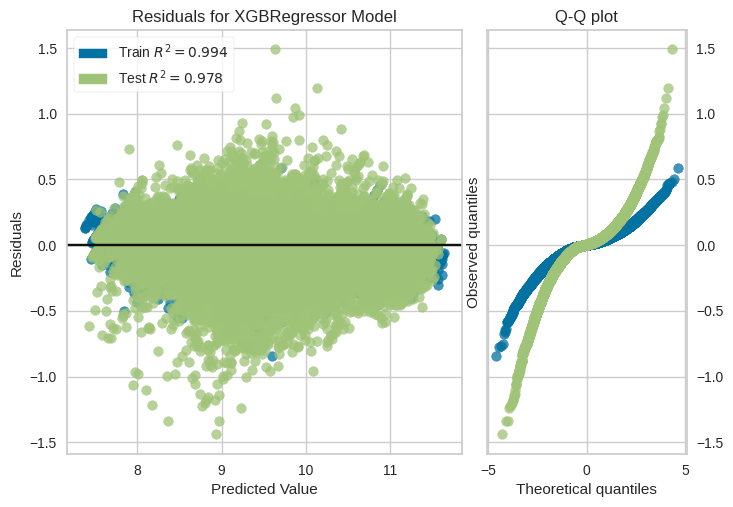

<Axes: title={'center': 'Residuals for XGBRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [109]:
# visualizer = ResidualsPlot(model)
visualizer = ResidualsPlot(model,hist=False, qqplot=True)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()  

In [8]:
df_r1 = df_r.copy()

In [9]:
df_r1['Price']= np.log1p(df_r1['Price'])
df_r1['Duration_in_hours']= np.log1p(df_r1['Duration_in_hours'])

## Take carefully

In [10]:
df_Economy = df_r1[df_r1['Class']=='Economy']
df_Business = df_r1[df_r1['Class']=='Business']

In [11]:
# Economy Class
# Getting dummies 
dfE_not_dum = df_Economy.drop(columns=['Date_of_journey','Journey_weekday','Airline','Class','Origin','Dep_time','Total_stops','Arriv_time','Destination'], axis=1)
dfE_dum = df_Economy[['Journey_weekday','Airline','Origin','Dep_time','Total_stops','Arriv_time','Destination']]
dfE_encoded = pd.get_dummies(dfE_dum, columns=['Journey_weekday','Airline','Origin','Dep_time','Total_stops','Arriv_time','Destination'], dtype='int')

# Final dataframe
dfE_final = dfE_not_dum.join(dfE_encoded, how='inner')
dfE_final = dfE_final.drop(columns=['Flight_code'],axis=1)
dfE_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 248323 entries, 0 to 445297
Data columns (total 46 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Duration_in_hours          248323 non-null  float64
 1   Days_left                  248323 non-null  int64  
 2   Price                      248323 non-null  float64
 3   Journey_month              248323 non-null  int32  
 4   Journey_day                248323 non-null  int32  
 5   Journey_weekday_Friday     248323 non-null  int64  
 6   Journey_weekday_Monday     248323 non-null  int64  
 7   Journey_weekday_Saturday   248323 non-null  int64  
 8   Journey_weekday_Sunday     248323 non-null  int64  
 9   Journey_weekday_Thursday   248323 non-null  int64  
 10  Journey_weekday_Tuesday    248323 non-null  int64  
 11  Journey_weekday_Wednesday  248323 non-null  int64  
 12  Airline_Air India          248323 non-null  int64  
 13  Airline_AirAsia            248323 

In [136]:
# Business Class
# Getting dummies 
dfB_not_dum = df_Business.drop(columns=['Date_of_journey','Journey_weekday','Airline','Class','Origin','Dep_time','Total_stops','Arriv_time','Destination'], axis=1)
dfB_dum = df_Business[['Journey_weekday','Airline','Origin','Dep_time','Total_stops','Arriv_time','Destination']]
dfB_encoded = pd.get_dummies(dfB_dum, columns=['Journey_weekday','Airline','Origin','Dep_time','Total_stops','Arriv_time','Destination'], dtype='int')

# Final dataframe
dfB_final = dfB_not_dum.join(dfB_encoded, how='inner')
dfB_final = dfB_final.drop(columns=['Flight_code'],axis=1)
dfB_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 126535 entries, 256 to 445365
Data columns (total 41 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Duration_in_hours          126535 non-null  float64
 1   Days_left                  126535 non-null  int64  
 2   Price                      126535 non-null  float64
 3   Journey_month              126535 non-null  int32  
 4   Journey_day                126535 non-null  int32  
 5   flight_code_encoded        126535 non-null  int64  
 6   price_log                  126535 non-null  float64
 7   Journey_weekday_Friday     126535 non-null  int64  
 8   Journey_weekday_Monday     126535 non-null  int64  
 9   Journey_weekday_Saturday   126535 non-null  int64  
 10  Journey_weekday_Sunday     126535 non-null  int64  
 11  Journey_weekday_Thursday   126535 non-null  int64  
 12  Journey_weekday_Tuesday    126535 non-null  int64  
 13  Journey_weekday_Wednesday  12653

In [12]:
X_E = dfE_final.drop('Price', axis=1)
y_E = dfE_final['Price']

In [53]:
X_E['Duration_in_hours'][
                        #(X_E["Airline_Air India"]==1)&
                        (X_E["Origin_Ahmedabad"]==1)&
                        #(X_E["Dep_time_12 PM - 6 PM"]==1)&
                        (X_E["Total_stops_non-stop"]==1)&
                        (X_E["Destination_Bangalore"]==1)].unique()

array([1.09861229, 1.12600045, 1.178655  , 1.2039628 , 1.15269004,
       1.25276297])

In [54]:
X_E['Days_left'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])

In [13]:
# Preparing train and test set
X_train_E, X_test_E, y_train_E, y_test_E = train_test_split(X_E,y_E,random_state=80, test_size=0.2)
X_train_E.shape, X_test_E.shape, y_train_E.shape, y_test_E.shape

((198658, 45), (49665, 45), (198658,), (49665,))

In [29]:
modelE = xgb.XGBRegressor(objective='reg:squarederror',colsample_bytree=0.8,learning_rate=0.1, max_depth=30 ,alpha=0.1 , n_estimators=50)

In [30]:
cv_scores_E = cross_val_score(modelE, X_E, y_E, cv=5, scoring='r2')
print("Cross-Validation Scores:", cv_scores_E)
print("Mean R2 Score:", cv_scores_E.mean())

Cross-Validation Scores: [0.35525546 0.64708928 0.64510823 0.19912476 0.54052563]
Mean R2 Score: 0.4774206705849501


In [41]:
# Hyperparameters
# Create a pipeline with the XGBoost model
pipeline = Pipeline([
    ('model', modelE)
])

# Define the hyperparameters to search
param_grid = {
    'model__n_estimators': [20, 50],           
    'model__learning_rate': [0.01, 0.1, 0.2],       
    'model__max_depth': [10, 20, 30],                             
    'model__colsample_bytree': [0.3, 0.5, 0.8],     
    }

# Use R^2 as the scoring metric
scorer = make_scorer(r2_score)

# Create the grid search
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring=scorer, cv=5)

# Fit the grid search to the data
grid_search.fit(X_train_E, y_train_E)

# Print the best parameters and the corresponding R^2 score
print("Best Parameters: ", grid_search.best_params_)
print("Best R^2 Score: ", grid_search.best_score_)

Best Parameters:  {'model__colsample_bytree': 0.5, 'model__learning_rate': 0.2, 'model__max_depth': 20, 'model__n_estimators': 50}
Best R^2 Score:  0.8793167160156724


In [14]:
modelE1 = xgb.XGBRegressor(objective='reg:squarederror',colsample_bytree=0.5,learning_rate=0.2, max_depth=20 ,alpha=0.1 , n_estimators=50)

In [43]:
modelE1.fit(X_train_E, y_train_E)
#y_pred_E = modelE.predict(X_test_E)

XGBRegressor(alpha=0.1, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.5, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=20, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=50, n_jobs=None,
             num_parallel_tree=None, ...)

In [45]:
cv_scores_E = cross_val_score(modelE1, X_E, y_E, cv=5, scoring='r2')
print("Cross-Validation Scores:", cv_scores_E)
print("Mean R2 Score:", cv_scores_E.mean())

Cross-Validation Scores: [0.40850874 0.60635779 0.60787423 0.21357244 0.53446507]
Mean R2 Score: 0.4741556538538803


In [44]:
y_pred_logE = modelE1.predict(X_test_E)

# Evaluate the performance on the test set
rmse_log = np.sqrt(mean_squared_error(y_test_E, y_pred_logE))

# Back-transform the predictions to the original scale
y_predE = np.expm1(y_pred_logE)
y_testE_original_scale = np.expm1(y_test_E)

# Evaluate the performance on the original scale
rmse_original_scale = np.sqrt(mean_squared_error(y_testE_original_scale, y_predE))
mae_original_scale = mean_absolute_error(y_testE_original_scale, y_predE)
r2_original_scale = r2_score(y_testE_original_scale, y_predE)

print(f"RMSE on original scale: {rmse_original_scale}")
print(f"MAE on original scale: {mae_original_scale}")
print(f"R2 on original scale: {r2_original_scale}")

RMSE on original scale: 1892.742246098468
MAE on original scale: 1057.7594038087411
R2 on original scale: 0.8275688618812159


In [22]:
!ls

C_dataset.csv.zip  project		   trained_model_E.pkl	y_train_E.csv
data		   project_artefact.ipynb  X_train_E.csv


In [19]:
with open('trained_model_E.pkl', 'wb') as model_file:
    pickle.dump(modelE1, model_file)

In [21]:
X_train_E.to_csv('X_train_E.csv', index=False)
y_train_E.to_csv('y_train_E.csv', index=False)

# Test is better?

In [1]:
from sklearn.metrics import r2_score, make_scorer
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV
from sklearn.pipeline import Pipeline
import xgboost as xgb
import numpy as np

# Define your custom scorer
def custom_scorer(estimator, X, y, sample_weight=None):
    # R2 score from cross_val_score
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    cv_scores = cross_val_score(estimator, X, y, scoring='r2', cv=kf, sample_weight=sample_weight)

    # R2 score from the grid search
    grid_search_score = r2_score(y, estimator.predict(X), sample_weight=sample_weight)

    # Combine the scores in a way that makes sense for your application
    combined_score = np.mean(cv_scores) + grid_search_score

    return combined_score

# Use make_scorer to create a scorer compatible with GridSearchCV
custom_combined_scorer = make_scorer(custom_scorer, greater_is_better=True, needs_proba=False, needs_threshold=False)

# Create the pipeline
modelE = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=0.8, learning_rate=0.1, max_depth=30, alpha=0.1, n_estimators=50)
pipeline = Pipeline([('model', modelE)])

# Define the hyperparameters to search
param_grid = {
    'model__n_estimators': [20, 50],
    'model__learning_rate': [0.01, 0.1, 0.2],
    'model__max_depth': [10, 20, 30],
    'model__colsample_bytree': [0.3, 0.5, 0.8],
}

# Create KFold cross-validation object
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Create the grid search
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring=custom_combined_scorer, cv=kf)

# Fit the grid search to the data
grid_search.fit(X_train_E, y_train_E)

# Print the best parameters, the corresponding combined score, and the cross-validated scores
print("Best Parameters: ", grid_search.best_params_)
print("Combined Score: ", grid_search.best_score_)


NameError: name 'X_train_E' is not defined

In [241]:
y_pred_E_original_scale = np.expm1(y_pred_E)
y_test_E_original_scale = np.expm1(y_test_E)

# Evaluation metrics on the original scale
print("r2_score(y_test, y_pred)", r2_score(np.expm1(y_test_E), y_pred_E_original_scale))
print('MAE ', mean_absolute_error(np.expm1(y_test_E), y_pred_E_original_scale))
print('RMSE', mean_squared_error(np.expm1(y_test_E), y_pred_E_original_scale)**0.5)

r2_score(y_test, y_pred) 0.8433963068052656
MAE  0.0017562223854143263
RMSE 0.0025234137461203495


<Axes: xlabel='Price'>

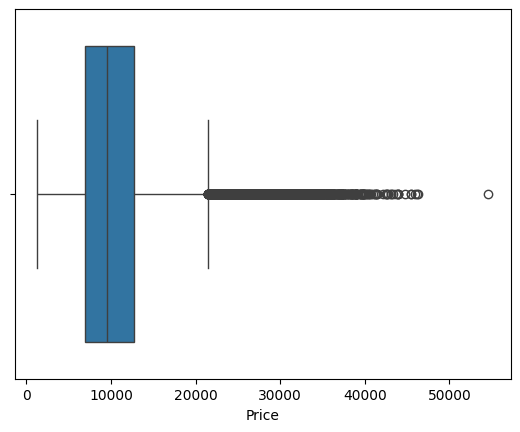

In [74]:
sns.boxplot(x=dfE_final['Price'])

### Business Class

In [78]:
df_r['Airline'][df_r['Class']=='Business'].value_counts()

Airline
Vistara      74279
Air India    52256
Name: count, dtype: int64

In [75]:
X_B = dfB_final.drop('Price', axis=1)
y_B = dfB_final['Price']

In [79]:
# Preparing train and test set
X_train_B, X_test_B, y_train_B, y_test_B = train_test_split(X_B,y_B,random_state=80, test_size=0.2)
X_train_B.shape, X_test_B.shape, y_train_B.shape, y_test_B.shape

((101228, 39), (25307, 39), (101228,), (25307,))

In [80]:
modelB = xgb.XGBRegressor(objective='reg:squarederror',colsample_bytree=0.8,learning_rate=0.1, max_depth=20 ,alpha=0.1 , n_estimators=50)

In [81]:
cv_scores_B = cross_val_score(modelB, X_B, y_B, cv=5, scoring='r2')
print("Cross-Validation Scores:", cv_scores_B)
print("Mean R2 Score:", cv_scores_B.mean())

Cross-Validation Scores: [0.24199081 0.19819433 0.44074447 0.26294505 0.2323692 ]
Mean R2 Score: 0.2752487740063905


In [83]:
modelB.fit(X_train_B, y_train_B)
y_pred_B = modelB.predict(X_test_B)

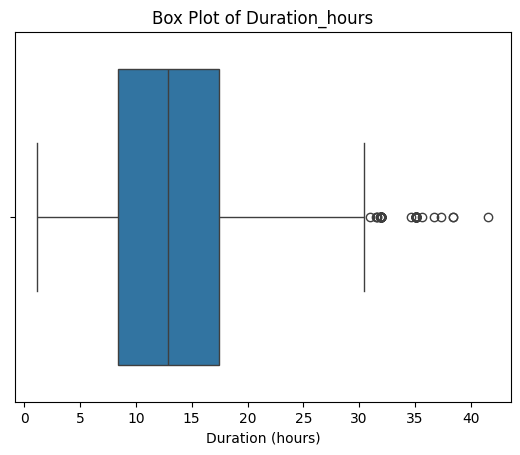

In [85]:
sns.boxplot(x=df_Business['Duration_in_hours'])
plt.xlabel('Duration (hours)')
plt.title('Box Plot of Duration_hours')
plt.show()

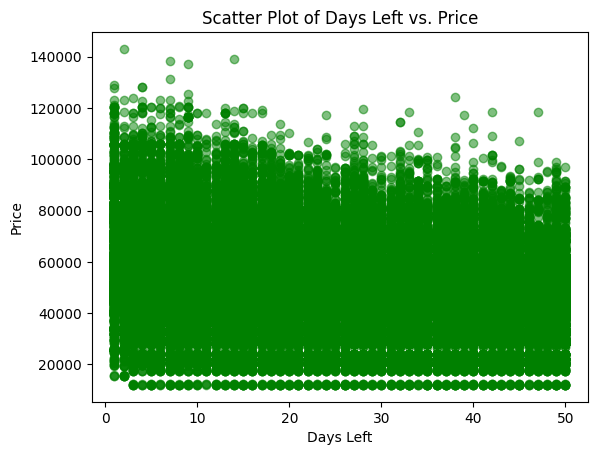

In [87]:
plt.scatter(df_Business['Days_left'], df_Business['Price'], alpha=0.5, color='green')
plt.xlabel('Days Left')
plt.ylabel('Price')
plt.title('Scatter Plot of Days Left vs. Price')
plt.show()

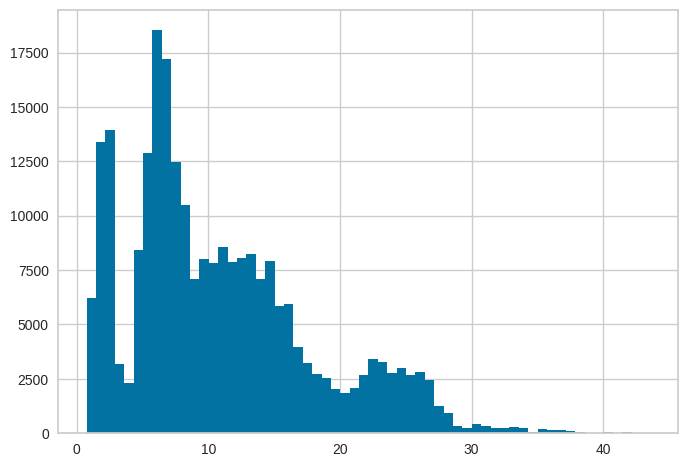

In [176]:
plt.hist(x=df_Economy['Duration_in_hours'], bins=60)
plt.show()

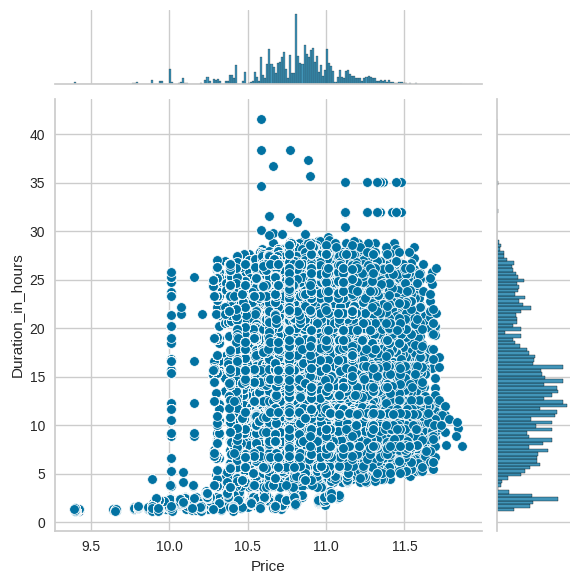

In [177]:
sns.jointplot(x=df_Business['Price'], y=df_Business['Duration_in_hours'])

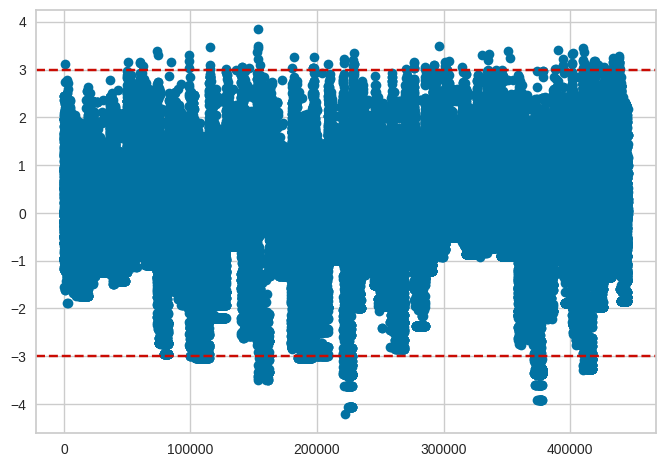

In [149]:
from scipy.stats import zscore

z_scores = zscore(df_Economy['Price'])
plt.plot(z_scores, marker='o', linestyle='None')
plt.axhline(y=3, color='r', linestyle='--')  # Upper threshold for outliers (adjust as needed)
plt.axhline(y=-3, color='r', linestyle='--')  # Lower threshold for outliers (adjust as needed)
plt.show()

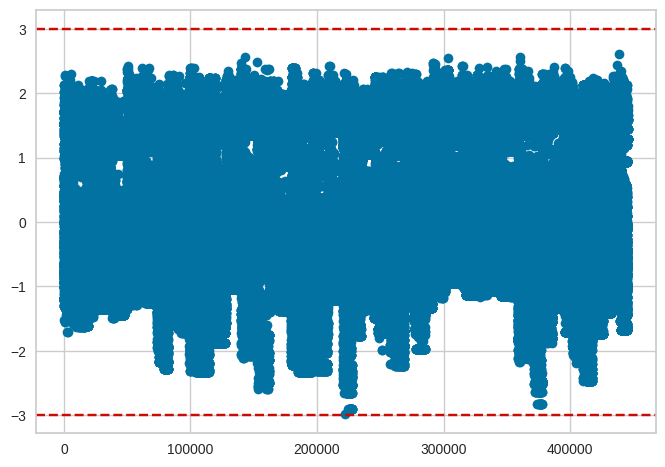

In [103]:
z_scores = zscore(y_log)
plt.plot(z_scores, marker='o', linestyle='None')
plt.axhline(y=3, color='r', linestyle='--')  # Upper threshold for outliers (adjust as needed)
plt.axhline(y=-3, color='r', linestyle='--')  # Lower threshold for outliers (adjust as needed)
plt.show()

In [150]:
modelE = xgb.XGBRegressor(objective='reg:squarederror',colsample_bytree=0.8,learning_rate=0.1, max_depth=10 ,alpha=0.1 , n_estimators=50)

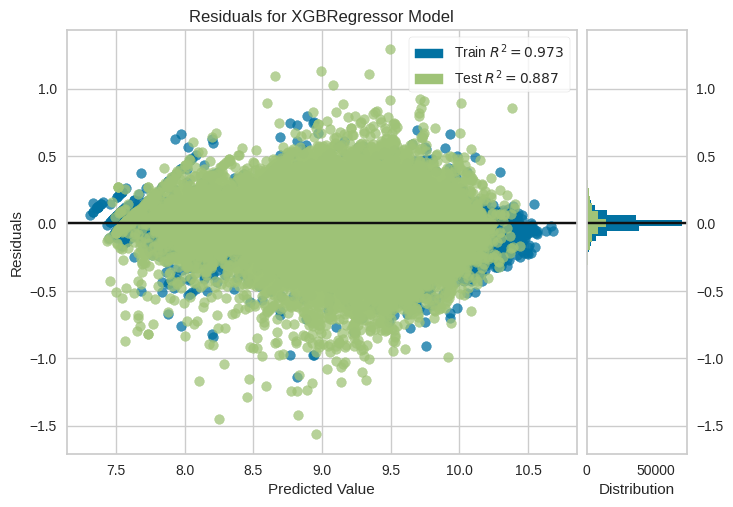

<Axes: title={'center': 'Residuals for XGBRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [15]:
visualizer = ResidualsPlot(modelE1, hist=True, qqplot=False)
visualizer.fit(X_train_E, y_train_E)  # Fit the training data to the visualizer
visualizer.score(X_test_E, y_test_E)  # Evaluate the model on the test data with original-scale y
visualizer.show()

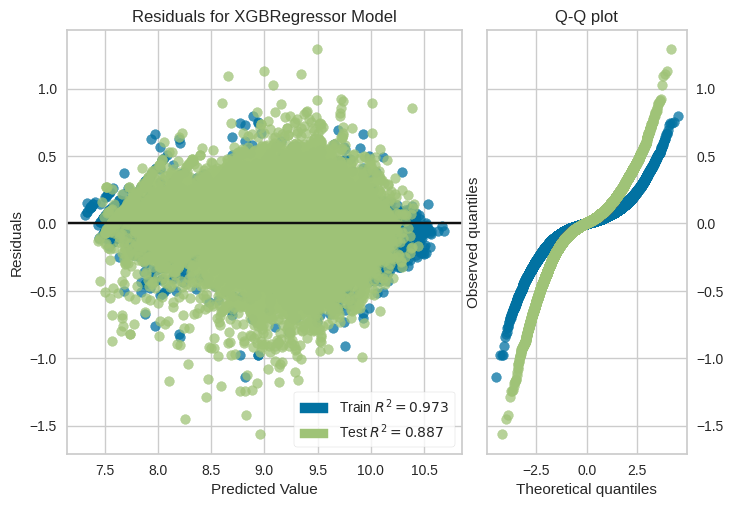

<Axes: title={'center': 'Residuals for XGBRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [16]:
# visualizer = ResidualsPlot(model)
visualizer = ResidualsPlot(modelE1,hist=False, qqplot=True)
visualizer.fit(X_train_E, y_train_E)  # Fit the training data to the visualizer
visualizer.score(X_test_E, y_test_E)  # Evaluate the model on the test data
visualizer.show()  

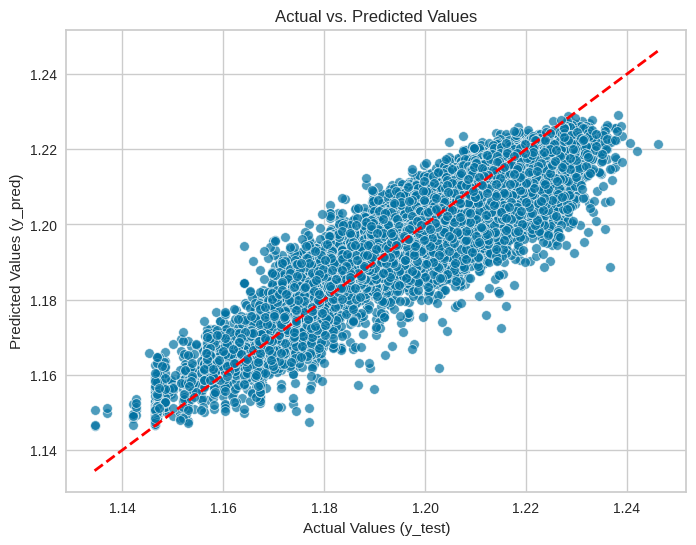

In [226]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_testE_original_scale, y=y_predE, alpha=0.7)

# Add labels and title
plt.xlabel("Actual Values (y_test)")
plt.ylabel("Predicted Values (y_pred)")
plt.title("Actual vs. Predicted Values")

# Add a diagonal line for reference (perfect predictions)
plt.plot([min(y_testE_original_scale), max(y_testE_original_scale)], [min(y_testE_original_scale), max(y_testE_original_scale)], linestyle='--', color='red', linewidth=2)

# Show the plot
plt.show()

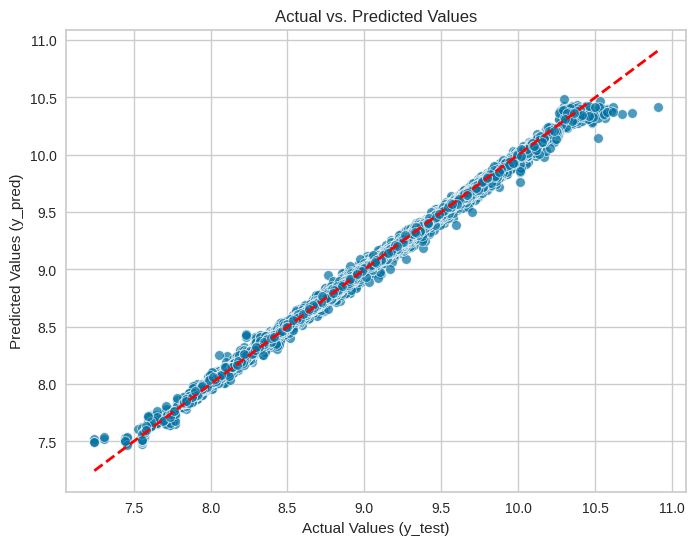

In [179]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test_E, y=y_pred_E, alpha=0.7)

# Add labels and title
plt.xlabel("Actual Values (y_test)")
plt.ylabel("Predicted Values (y_pred)")
plt.title("Actual vs. Predicted Values")

# Add a diagonal line for reference (perfect predictions)
plt.plot([min(y_test_E), max(y_test_E)], [min(y_test_E), max(y_test_E)], linestyle='--', color='red', linewidth=2)

# Show the plot
plt.show()

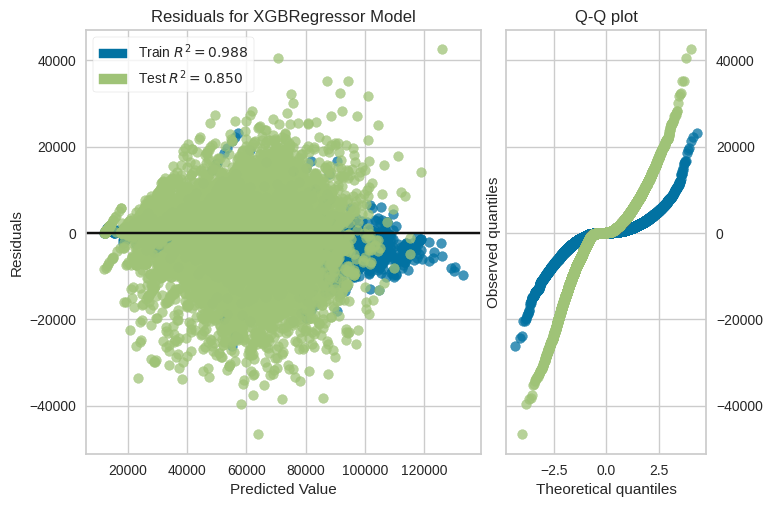

<Axes: title={'center': 'Residuals for XGBRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [121]:
visualizer = ResidualsPlot(modelB,hist=False, qqplot=True)
visualizer.fit(X_train_B, y_train_B)  # Fit the training data to the visualizer
visualizer.score(X_test_B, y_test_B)  # Evaluate the model on the test data
visualizer.show()

In [228]:
y_pred_E[:10]

array([0.78865933, 0.7859393 , 0.78265387, 0.784827  , 0.7952088 ,
       0.7891634 , 0.7930439 , 0.7843387 , 0.7905409 , 0.7817265 ],
      dtype=float32)

In [229]:
y_pred_E_original_scale[:10]

array([ 9902.435 ,  8266.23  ,  6452.882 ,  8214.154 , 14197.169 ,
       10739.74  , 18194.826 ,  8019.221 , 11673.919 ,  5913.4453],
      dtype=float32)

In [248]:
y_test_E[:10]

138718    0.581494
330840    0.580147
192226    0.578376
13086     0.580238
305859    0.584070
111394    0.582174
331632    0.586212
264608    0.579872
163795    0.582763
425773    0.577496
Name: Price, dtype: float64

In [23]:
df_r['Price'].min()

1307

In [24]:
df_r1['Price'].min()

7.176254532017144

In [33]:
y_testE_original_scale[:10]

138718     9852.0
330840     8252.0
192226     6583.0
13086      8350.0
305859    14015.0
111394    10794.0
331632    19055.0
264608     7964.0
163795    11694.0
425773     5901.0
Name: Price, dtype: float64

In [34]:
y_test_E[:10]

138718    9.195531
330840    9.018332
192226    8.792398
13086     9.030137
305859    9.547955
111394    9.286838
331632    9.855137
264608    8.982812
163795    9.366917
425773    8.683047
Name: Price, dtype: float64

In [35]:
y_pred_logE[:10]

array([9.210208 , 9.0164795, 8.817739 , 8.784348 , 9.5646   , 9.242847 ,
       9.545567 , 8.930202 , 9.177048 , 8.642788 ], dtype=float32)

In [36]:
y_predE

array([ 9997.676 ,  8236.725 ,  6751.9756, ...,  2611.3433, 14795.545 ,
       12262.34  ], dtype=float32)